In [31]:
import numpy as np
import pandas as pd
import sklearn as sk
from pandas import concat
from sklearn.linear_model import LinearRegression
from datetime import datetime
from matplotlib import pyplot as plt, dates as mdates
from sklearn.metrics import mean_absolute_error

In [32]:
# Load and Clean Data #

df = pd.read_csv(r'C:\Users\wills\BigData\Data\covid_19_indonesia_time_series_all.csv')

df = df.drop(df[df['Location Level'] == 'Country'].index, inplace = False)


df = df[['Date', 'New Cases', 'New Deaths']]


df.Date = pd.to_datetime(df.Date)

    
df = df.groupby(['Date']).agg({'New Cases':'sum','New Deaths':'sum'})
df = df.reset_index()

print(df)

df.to_csv('test.csv', index=False)



          Date  New Cases  New Deaths
0   2020-03-01          2           0
1   2020-03-02          3           0
2   2020-03-03          3           1
3   2020-03-04          3           0
4   2020-03-05          1           1
..         ...        ...         ...
637 2021-11-28        265           0
638 2021-11-29        177          11
639 2021-11-30        297          11
640 2021-12-01        278           2
641 2021-12-02        299           3

[642 rows x 3 columns]


Text(0.5, 1.0, 'Number of new cases/deaths of/from Covid-19 per day')

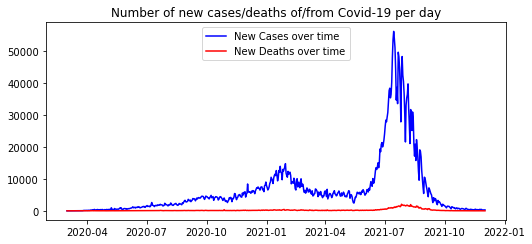

In [48]:
# New Cases/Deaths trends across the year #

df = pd.read_csv(r'C:\Users\wills\BigData\test.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Date'],ascending=True)

df = df.set_index('Date')

plt.plot(df.index, df['New Cases'], 'blue', label='New Cases over time')
plt.plot(df.index, df['New Deaths'], 'red', label='New Deaths over time')
plt.legend(loc='upper center')
plt.title("Number of new cases/deaths of/from Covid-19 per day")

In [36]:
# Time series model #

df = pd.read_csv(r'C:\Users\wills\BigData\test.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Date'],ascending=True)
df = df.set_index('Date')

def series_to_ss_supervised(data, lag_step, dropnan=True):
    df = pd.DataFrame(data)
    names = list()
    values = list()
    for i in range(0,lag_step+3):
        values.append(df.shift(i))
        names+=([(f'{j}_t-({i})')for j in df.columns])
    agg = pd.concat(values,axis=1)
    agg.columns = names
    agg = agg.fillna(0)
    return agg

lag_step=7
df = series_to_ss_supervised(df,lag_step)

1454.4274958344242


Text(0.5, 1.0, 'Prediction model of new cases of Covid-19 per day')

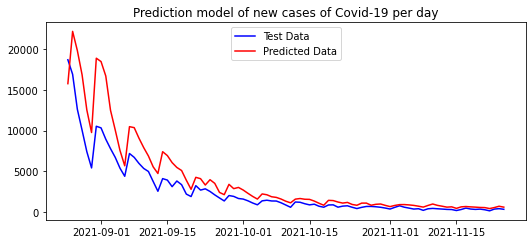

In [46]:

# New Cases models #

X = df[[f'New Cases_t-({lag_step})',f'New Deaths_t-({lag_step})']]
X_train = X.head(400)
X_test = X.tail(100)
X_test = X_test.head(93)
y = df['New Cases_t-(0)']
y_train = y.head(400)
y_test = y.tail(100)
y_test = y_test.head(93)

model = LinearRegression() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
print(MAE)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(X_test.index, y_test, 'blue', label='Test Data')
plt.plot(X_test.index, y_pred, 'red', label='Predicted Data')
plt.legend(loc='upper center')
plt.title("Prediction model of new cases of Covid-19 per day")

Text(0.5, 1.0, 'Linear graph')

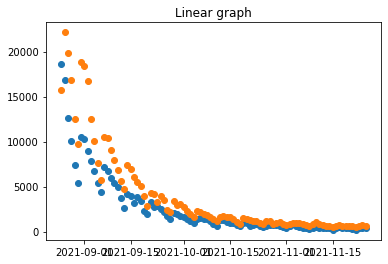

In [38]:
plt.scatter(X_test.index, y_test)
plt.scatter(X_test.index, y_pred)
plt.title("Linear graph")

In [39]:
model.coef_

array([0.94379987, 0.55657172])

49.86853317206717


Text(0.5, 1.0, 'Prediction model of new deaths by Covid-19 per day')

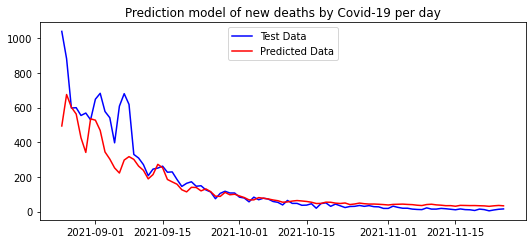

In [47]:

# New Deaths models #


X = df[[f'New Cases_t-({lag_step})',f'New Deaths_t-({lag_step})']]
X_train = X.head(400)
X_test = X.tail(100)
X_test = X_test.head(93)
y = df['New Deaths_t-(0)']
y_train = y.head(400)
y_test = y.tail(100)
y_test = y_test.head(93)

model = LinearRegression() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
print(MAE)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(X_test.index, y_test, 'blue', label='Test Data')
plt.plot(X_test.index, y_pred, 'red', label='Predicted Data')
plt.legend(loc='upper center')
plt.title("Prediction model of new deaths by Covid-19 per day")

Text(0.5, 1.0, 'Linear graph')

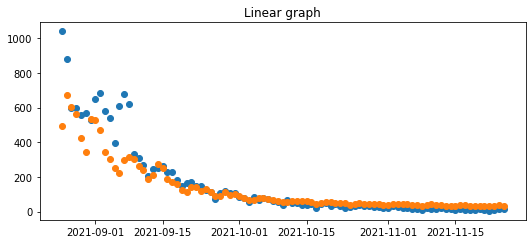

In [259]:
plt.scatter(X_test.index, y_test)
plt.scatter(X_test.index, y_pred)
plt.title("Linear graph")

In [258]:
model.coef_

array([0.01618098, 0.19325535])